In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime
path = "/content/drive/My Drive/Ocean Cleanup Project/Data_Level5_BAH_OceanCleanup.csv"
data = pd.read_csv(path)



data['Cleanup Date'] = data['Cleanup Date'].astype(str)
data.head(10)
data = data[data['Cleanup ID'] != 38373] 
data = data[data['Cleanup Date'] != 'nan']


for i in data.index:
  data.at[i, 'Cleanup Date'] = datetime.datetime.strptime(data.at[i,'Cleanup Date'], "%m/%d/%Y").strftime("%Y-%m-%d")

data.head()


#data = data.set_index('Cleanup Date', parse_dates=['Cleanup Date'])


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line (1 yard/meter = 1 piece),Rope (1 yard/meter = 1 piece),Fishing Gear (Clean Swell),6-Pack Holders,Other Plastic/Foam Packaging,"Other Plastic Bottles (oil, bleach, etc.)",Strapping Bands,Tobacco Packaging/Wrap,Other Packaging (Clean Swell),"Appliances (refrigerators, washers, etc.)",Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",2014-12-22,NaN,1.0,0.0,1.0,0.04,0.0090,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
1,87,"Fairfax County, VA, USA","Virginia, USA",United States,"38.87456, -77.24428","Land (beach, shoreline and inland)",2014-12-24,NaN,1.0,0.0,1.0,0.73,1.3903,0.0,1,0,0,1,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10.0
2,92,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.04405","Land (beach, shoreline and inland)",2015-02-19,NaN,1.0,0.0,1.0,0.63,0.0214,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4.0
3,93,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2015-02-19,NaN,1.0,0.0,1.0,0.06,0.0302,0.0,1,0,0,0,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0
4,94,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2015-02-19,NaN,1.0,0.0,1.0,0.06,0.0302,0.0,1,0,0,0,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0


In [ ]:
# from google.colab import files
# data.to_csv('Cleanup_timeseries.csv')
# files.download('Cleanup_timeseries.csv')

In [ ]:
import pandas as pd
import datetime
path = "/content/drive/My Drive/Ocean Cleanup Project/Cleanup_timeseries.csv"
data = pd.read_csv(path,index_col=['Cleanup Date'], parse_dates=['Cleanup Date'])
data.head(10)



,Unnamed: 0,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Group Name,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line (1 yard/meter = 1 piece),Rope (1 yard/meter = 1 piece),Fishing Gear (Clean Swell),6-Pack Holders,Other Plastic/Foam Packaging,"Other Plastic Bottles (oil, bleach, etc.)",Strapping Bands,Tobacco Packaging/Wrap,Other Packaging (Clean Swell),"Appliances (refrigerators, washers, etc.)",Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
Cleanup Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-22,0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.04,0.0090,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
2014-12-24,1,87,"Fairfax County, VA, USA","Virginia, USA",United States,"38.87456, -77.24428","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.73,1.3903,0.0,1,0,0,1,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10.0
2015-02-19,2,92,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.04405","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.63,0.0214,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4.0
2015-02-19,3,93,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.06,0.0302,0.0,1,0,0,0,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0
2015-02-19,4,94,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.06,0.0302,0.0,1,0,0,0,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0
2015-03-10,5,102,"Washington, DC, USA","District of Columbia, USA",United States,"38.90728, -77.04411","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,2.67,0.1415,0.0,0,0,1,1,1,0,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,0,1,17.0
2015-03-10,6,115,"Washington, DC, USA","District of Columbia, USA",United States,"38.90745, -77.04423","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.11,0.0231,0.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.0
2015-03-18,7,117,"Washington, DC, USA","District of Columbia, USA",United States,"38.9074, -77.04382","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.73,0.0398,0.0,0,1,1,0,1,0,0,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0
2015-03-24,8,121,"Washington, DC, USA","District of Columbia, USA",United States,"38.90756, -77.04415","Land (beach, shoreline and inland)",NaN,1.0,0.0,1.0,0.66,0.0730,0.0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10.0


In [ ]:
data.index

DatetimeIndex(['2014-12-22', '2014-12-24', '2015-02-19', '2015-02-19',
               '2015-02-19', '2015-03-10', '2015-03-10', '2015-03-18',
               '2015-03-24', '2015-03-24',
               ...
               '2019-10-05', '2019-10-26', '2019-09-21', '2019-10-19',
               '2019-09-28', '2019-09-21', '2019-09-21', '2019-09-21',
               '2019-09-21', '2019-09-21'],
              dtype='datetime64[ns]', name='Cleanup Date', length=37902, freq=None)

In [ ]:
ts = data['Pounds']
# ts.head(10)
ts = ts[ts.index > '2014-12-31']
ts = ts[ts.index < '2020-01-01']
ts = ts.sort_index()
ts = ts.groupby([lambda x: x.year, lambda x: x.month]).sum()
# ts.index = pd.to_datetime(ts.index, infer_datetime_format=True)

ts = ts.to_frame()
ts
ts = ts.reset_index()
ts.columns = ['Y', 'M', 'Pounds']
ts['D'] = '01'
ts['D'] = ts['D'].astype(int)
list1 = pd.to_datetime(ts.Y*10000+ts.M*100+ts.D,format='%Y%m%d')
list2 = ts['Pounds'].tolist()

d = {'Date':list1,'Pounds':list2}
ts = pd.DataFrame(d)
ts = ts.set_index(['Date'])
# type(ts)

In [ ]:
ts['2016']

,Pounds
Date,
2016-01-01,340.99
2016-02-01,684.77
2016-03-01,379.57
2016-04-01,9175.95
2016-05-01,1218.97
2016-06-01,1097.67
2016-07-01,939.12
2016-08-01,172679.01
2016-09-01,2205389.06


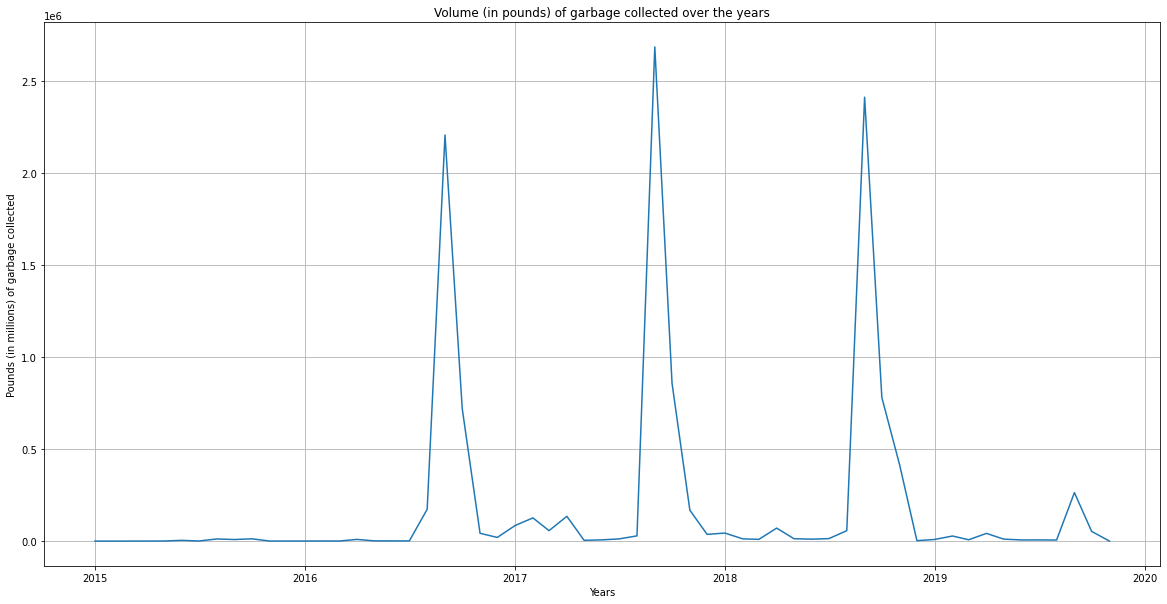

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(ts.Pounds)
plt.title('Volume (in pounds) of garbage collected over the years')
plt.ylabel("Pounds (in millions) of garbage collected")
plt.xlabel("Years")
plt.grid(True)
plt.show()

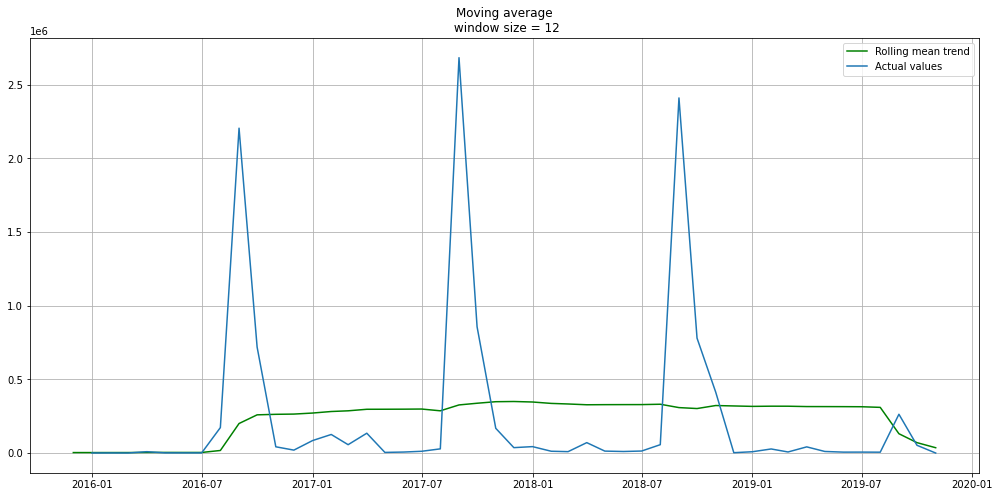

In [ ]:
# #Rolling statistics
# rollmean = ts.rolling(window=12).mean()
# rollstd = ts.rolling(window=12).std()

# print(rollmean, rollstd)

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(ts.Pounds, 12)

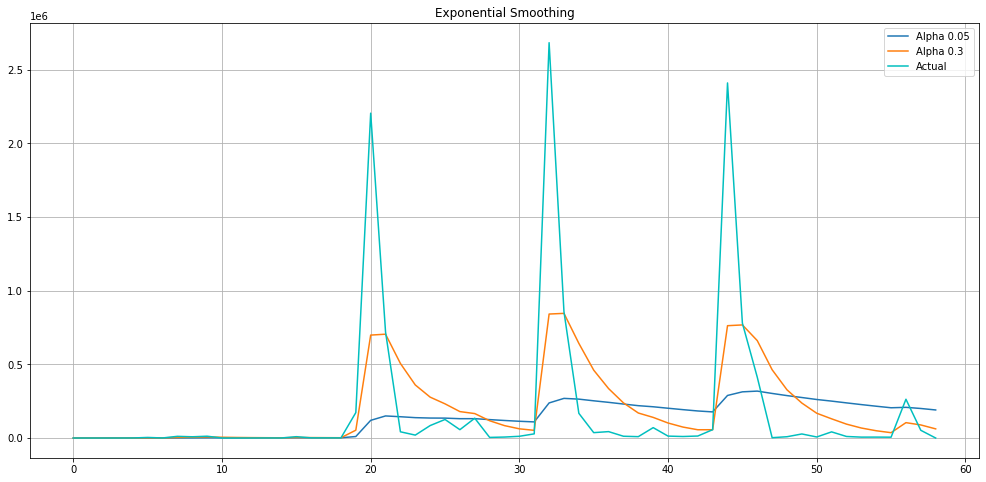

In [ ]:
# #Plot rolling statistics
# plt.figure(figsize=(20, 10))
# orig = plt.plot(ts, color = 'blue', label = 'original')
# mean = plt.plot(rollmean, color = 'red', label = 'Rolling mean')
# std = plt.plot(rollstd, color = 'black', label = 'Rolling std')
# plt.legend(loc='best')
# plt.title('Rolling Mean and Standard Deviation')
# plt.grid(True)
# plt.show(block = 'False')


def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(ts.Pounds, [0.05, 0.3])

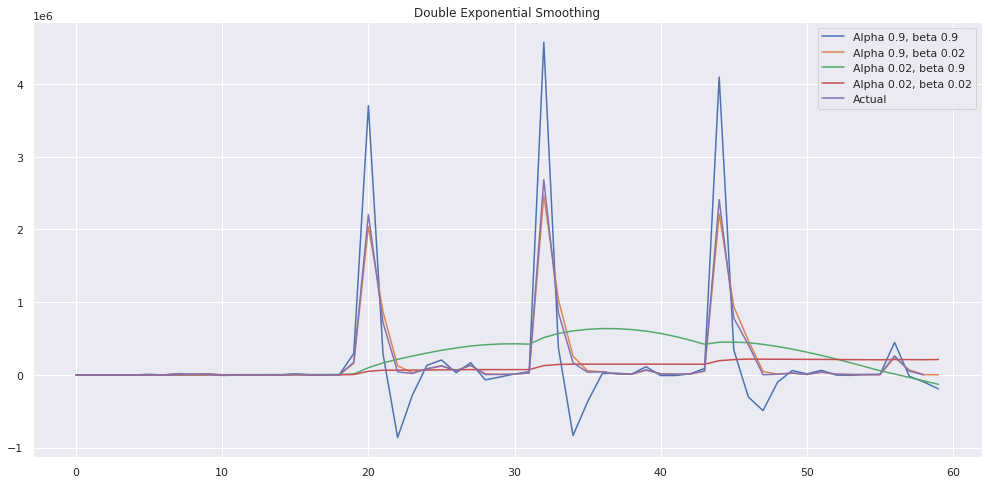

In [ ]:
# #Dickey-Fuller Test
# from statsmodels.tsa.stattools import adfuller

# print('Results of Dickey-Fuller test:')
# dftest = adfuller(ts['Pounds'], autolag='AIC')
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# of lags used', 'No of observations used'])
# for key,value in dftest[4].items():
#   dfoutput['Critical Value (%s)'%key] = value

# print(dfoutput)

def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(ts.Pounds, alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

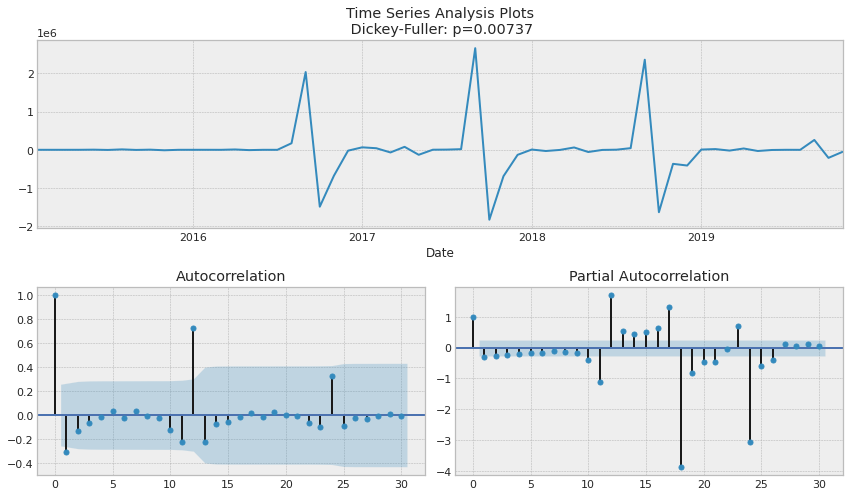

In [ ]:
# #Estimate Trend
# import numpy as np
# ts_log = np.log(ts)
# plt.figure(figsize=(20, 10))
# plt.grid(True)
# plt.plot(ts_log)

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
# tsplot(ts.Pounds, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = ts.Pounds - ts.Pounds.shift(1)

tsplot(data_diff[1:], lags=30)

In [ ]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(ts.Pounds, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(ts.Pounds, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())


                                 Statespace Model Results                                
Dep. Variable:                            Pounds   No. Observations:                   59
Model:             SARIMAX(4, 1, 4)x(0, 1, 1, 5)   Log Likelihood                -780.715
Date:                           Mon, 03 Aug 2020   AIC                           1581.431
Time:                                   21:37:40   BIC                           1601.133
Sample:                               01-01-2015   HQIC                          1589.007
                                    - 11-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8291      1.039     -1.760      0.078      -3.866       0.208
ar.L2         -1.3913      1.328     -1.04

In [ ]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error =  mean_absolute_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Error: {0:.2f}".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.ylabel("Pounds (in millions) of garbage collected")
    plt.xlabel("Years")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

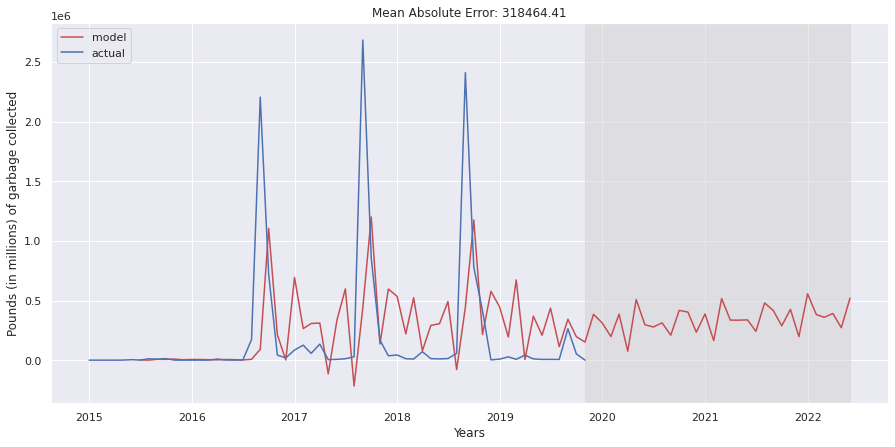

In [ ]:
plotSARIMA(ts, best_model, 30)

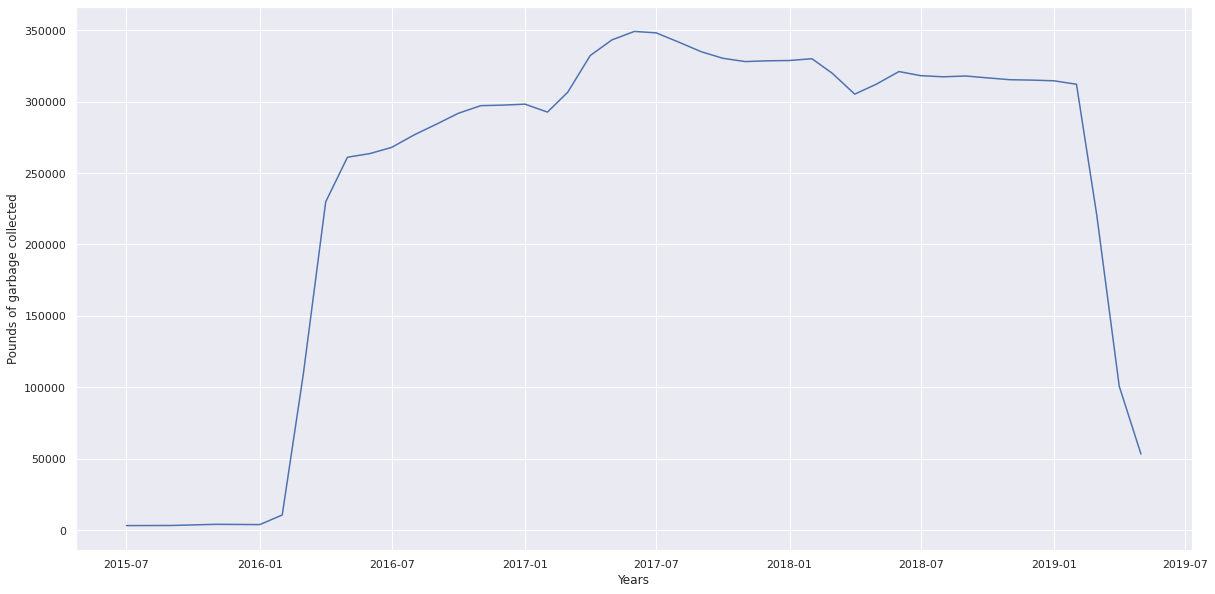

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =  seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 10))
plt.ylabel("Pounds of garbage collected")
plt.xlabel("Years")
plt.plot(trend, label = 'Trend')
# plt.subplot(413)

In [ ]:
# #Rolling statistics
# movingAvg = ts_log.rolling(window=12).mean()
# movingSTD = ts_log.rolling(window=12).std()

# plt.figure(figsize=(20, 10))
# orig = plt.plot(ts_log, color = 'blue', label = 'original')
# avg = plt.plot(movingAvg, color = 'red', label = 'Rolling mean')
# std = plt.plot(movingSTD, color = 'black', label = 'Rolling std')
# plt.legend(loc='best')
# plt.title('Moving Average and Standard Deviation')
# plt.grid(True)
# plt.show(block = 'False')

# from statsmodels.tsa.stattools import adfuller

# print('Results of Dickey-Fuller test:')
# dftest = adfuller(ts_log['Pounds'], autolag='AIC')
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# of lags used', 'No of observations used'])
# for key,value in dftest[4].items():
#   dfoutput['Critical Value (%s)'%key] = value

# print(dfoutput)

In [ ]:
# #Log minus moving avg - Transformation to make stationary
# ts_logminus_moving = ts_log - movingAvg
# # ts_logminus_moving.head(10)

# ts_logminus_moving.dropna(inplace=True)
# ts_logminus_moving.head(10)

In [ ]:
# #ADCF - Dickey Fuller actual coded
# from statsmodels.tsa.stattools import adfuller
# def test_stationarity(timeseries):
#   #Rolling stats
#   movingAverage = timeseries.rolling(window=12).mean()
#   moving_STD = timeseries.rolling(window=12).std()

#   #Plot Rolling
#   plt.figure(figsize=(20, 10))
#   orig = plt.plot(timeseries, color = 'blue', label = 'original')
#   mean = plt.plot(movingAverage, color = 'red', label = 'Rolling mean')
#   std = plt.plot(moving_STD, color = 'black', label = 'Rolling std')
#   plt.legend(loc='best')
#   plt.grid(True)
#   plt.title('Rolling Mean and STD')
#   plt.show(block=False)

#   #Dickey Fuller
#   print('Results of Dickey-Fuller test:')
#   dftest = adfuller(timeseries['Pounds'], autolag='AIC')
#   dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# of lags used', 'No of observations used'])
#   for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value

#   print(dfoutput)



In [ ]:
# test_stationarity(ts_logminus_moving)

In [ ]:
# exponentialDecayWeightedAvg = ts_log.ewm(halflife=12).mean()
# plt.figure(figsize=(20, 10))
# plt.plot(ts_log)
# plt.grid(True)
# plt.plot(exponentialDecayWeightedAvg, color = 'red')


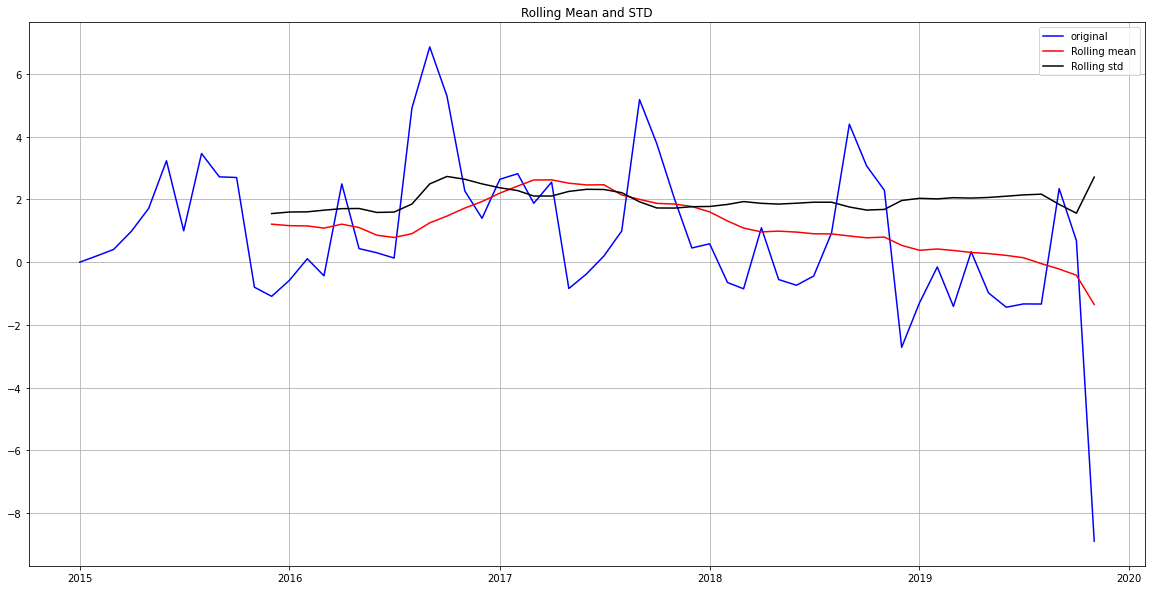

Results of Dickey-Fuller test:
Test Statistic             -3.317007
p-value                     0.014135
# of lags used              1.000000
No of observations used    57.000000
Critical Value (1%)        -3.550670
Critical Value (5%)        -2.913766
Critical Value (10%)       -2.594624
dtype: float64


In [ ]:
# ts_logminus_weighted = ts_log - exponentialDecayWeightedAvg
# test_stationarity(ts_logminus_weighted)

In [ ]:
# #Shifting the dataset - Differenciation
# ts_logDiff_shift = ts_log - ts_log.shift()
# plt.figure(figsize=(20, 10))
# plt.grid(True)
# plt.plot(ts_logDiff_shift)

In [ ]:
# from statsmodels.tsa.stattools import kpss
# #define KPSS
# def kpss_test(timeseries):
#     print ('Results of KPSS Test:')
#     kpsstest = kpss(timeseries, regression='c')
#     kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
#     for key,value in kpsstest[3].items():
#       kpss_output['Critical Value (%s)'%key] = value
#     print (kpss_output)

# ts_logDiff_shift.dropna(inplace=True)
# test_stationarity(ts_logDiff_shift)
# kpss_test(ts_logDiff_shift)

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition =  seasonal_decompose(ts)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(411)
# plt.plot(ts, label = 'Original')
# plt.subplot(412)
# plt.plot(trend, label = 'Trend')
# plt.subplot(413)
# plt.plot(seasonal, label = 'Seasonal')
# plt.subplot(414)
# plt.plot(residual, label = 'Residual')
# plt.legend(loc = 'best')
# plt.tight_layout()

# decomposedLogData = residual
# decomposedLogData.dropna(inplace=True)
# test_stationarity(decomposedLogData)

In [ ]:
# from statsmodels.tsa.stattools import acf, pacf

# lag_acf = acf(ts_logDiff_shift, nlags =20)
# lag_pacf = pacf(ts_logDiff_shift, nlags =20, method = 'ols')

# #Plot ACF: 
# plt.subplot(121)
# plt.plot(lag_acf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_logDiff_shift)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_logDiff_shift)),linestyle='--',color='gray')
# plt.title('Autocorrelation Function')
# plt.tight_layout()

# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_logDiff_shift)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_logDiff_shift)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()


In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts_log, order=(1, 1, 0))  
# results_AR = model.fit(disp=-1)  
# plt.plot(ts_logDiff_shift)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_logDiff_shift['Pounds'])**2))

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts_log, order=(2, 1, 2))  
# results_AR = model.fit(disp=-1)  
# plt.plot(ts_logDiff_shift)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_logDiff_shift['Pounds'])**2))

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts_log, order=(1, 1, 1))  
# results_AR = model.fit(disp=-1)  
# plt.plot(ts_logDiff_shift)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_logDiff_shift['Pounds'])**2))